## Loading data on a Windows machine

The dataset of Ryan Moore has been used [https://nd013.s3.amazonaws.com/track1.zip](here):

The dataset has two folders 'driving' folder and 'recovery' folder. Currently the driving folder is used only.

The driving folder contains csv file for steering measurements and IMG folder. The images are in three colums, snapped from center, right and left cameras. They have a corresponding steering angle – the steer the car had to make in that frame to stay on the track. We load both into images[ ] and measurements[ ] arrays. 
The csv file named 'driving_log.csv' has 7874 x 7 data entries. We are interested in the first 4 columns. 

Center image path | Left image path | Right image path | Steering angle range (-1,+1)

if steering <0 : steering to left , if steering > 0 : seering to right, steering = 0 : idle 


In [22]:
import csv
import cv2
import numpy as np

lines = []
path = "E:\\internet related\\Dropbox\\Online-courses\\carnd\\term1\\Carnd-p3\\files\\Ryan-Moore-data\\track1\\"
with open(path + 'drive\\driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []

for line in lines:
    source_path = line[0]
    tokens = source_path.split('\\')
    filename = tokens[-1]
    local_path = path + "drive\\IMG\\" + filename
    image = cv2.imread(local_path)
    images.append(image)
    measurement = line[3]
    measurements.append(measurement)

X_train = np.array(images[0:])
y_train = np.array(measurements[0:])

In [28]:
X_train = np.array(images[0:])
y_train = np.array(measurements[0:])

In [29]:
X_train.shape


(7874, 160, 320, 3)

In [30]:
y_train.shape

(7874,)

In [31]:
lines[0]


['E:\\internet related\\Dropbox\\Online-courses\\carnd\\term1\\Carnd-p3\\files\\Ryan-Moore-data\\track1\\drive\\IMG\\center_2017_02_25_15_00_06_006.jpg',
 ' E:\\internet related\\Dropbox\\Online-courses\\carnd\\term1\\Carnd-p3\\files\\Ryan-Moore-data\\track1\\drive\\IMG\\left_2017_02_25_15_00_06_006.jpg',
 ' E:\\internet related\\Dropbox\\Online-courses\\carnd\\term1\\Carnd-p3\\files\\Ryan-Moore-data\\track1\\drive\\IMG\\right_2017_02_25_15_00_06_006.jpg',
 '0',
 '0.9663736',
 '0',
 '30.1818']

In [32]:
len(images)

7874

In [33]:
local_path


'E:\\internet related\\Dropbox\\Online-courses\\carnd\\term1\\Carnd-p3\\files\\Ryan-Moore-data\\track1\\drive\\IMG\\center_2017_02_25_15_13_50_499.jpg'

#### Showing an example of an image (the last image)

In [34]:
iii = cv2.imread(local_path)

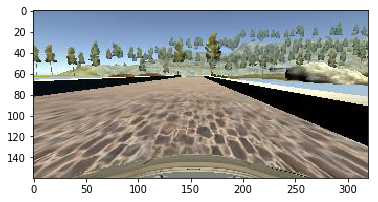

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(cv2.cvtColor(iii, cv2.COLOR_RGB2BGR))

#### I will not continue on this windows machine with no GPU because Keras was not responsive when running the next cell. I will switch to AWS after copying this notebook and changing the paths here and in the excel files

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True)
model.save('model.h5')